### ML Pipeline

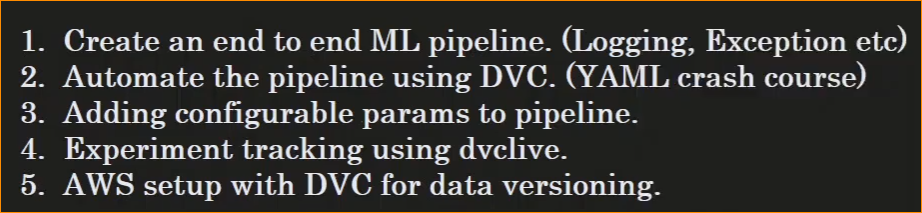

- In ML Pipeline, We create all the components of ML Projects as outlined in jupyter notebook
- Create pipeline.py to call all components
- This will enable us to automate the complete workflow, help us debug in case of exception, scale the code, create proper logs etc
- Start with experimenting in jupyter (check experiments folder)
- create a new folder `src` and create all components inside src folder:
    1. logging: to create logs
    2. exception: to raise custom exception for debugging
    3. data_ingestion (split data in the begining into train and test to avoid data leakage) : fetch data from cloud/dbs etc
    4. data_preprocessing (apply preprocessing twice train & test data): perform cleaning & preprocessing
    5. feature_engineering: perform fe
    6. model_trainer: perform model training on multiple models
    7. model_evaluation: select best model out of all the models trained and create reports
- Add all artifacts in gitignore since we will be tracking them with dvc
- `Automate these components using dvc pipeline`:
    1. Create dvc.yaml file with stages listed
    2. dvc init and then do `dvc repro` to test pipeline automation: this will generate a dvc.lock file after processing everything which will have meta data of all artifacts
    3. run dvc dag to view the dependencies

    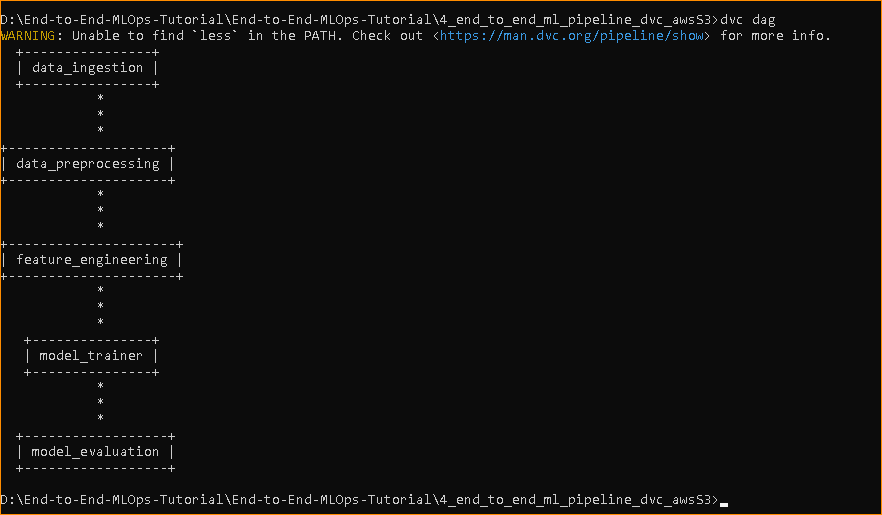

    4. then perform git add commit push

- **Important**: Above is the pipeline autmation using `dvc` where we are also keeping track of artifacts with each code change but the problem is that we are defining parameters multiple times in the code, To make it more structured, Its better write 1 config file where we will define all the params and reference that config file everywhere. The benefit of this will be that in future if we have to perform some experiments by changing those parameters, We woudn't have to change it everywhere, We can just edit the config file.

- `Add params.yaml` file and configuration in it
- `Add params setup in each component` and related related param for that component like for data ingestion add test size etc
- Edit dvc.yaml file and add params key reference
- perform `dvc repro` again and test the pipeline by changing the params.yaml file config values


**`Experiment Tracking using DVC Live`**
- In Real life projects, we will be performing a lot of experiments to achieve best performance
- How can track those results & params use to achieve that accuracy?
- We can use `MLFlow` and other tools but for now we will use `dvc live`
- To do it: We will edit model_evaluation file
    1. pip install dvclive
    2. add imports
    3. add load_params function and initiate params variable in main
    4. add dvc experimenting code block
    5. run `dvc exp run` to save the details: it will create dvc.yaml(stages file) if not there and dvclive directory to save each run info

    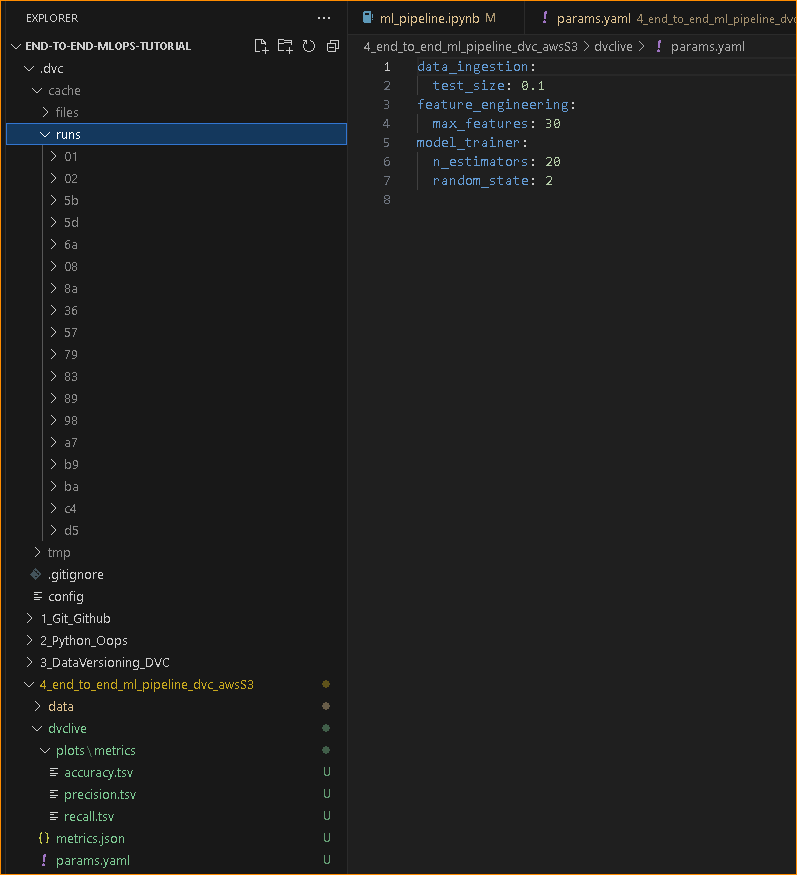 

    6. run this 2-3 times with different params for experimentation, It will create a report which can be accessed using dvc extension which will show the performance of each run along with the acuracy, params used, model files etc

    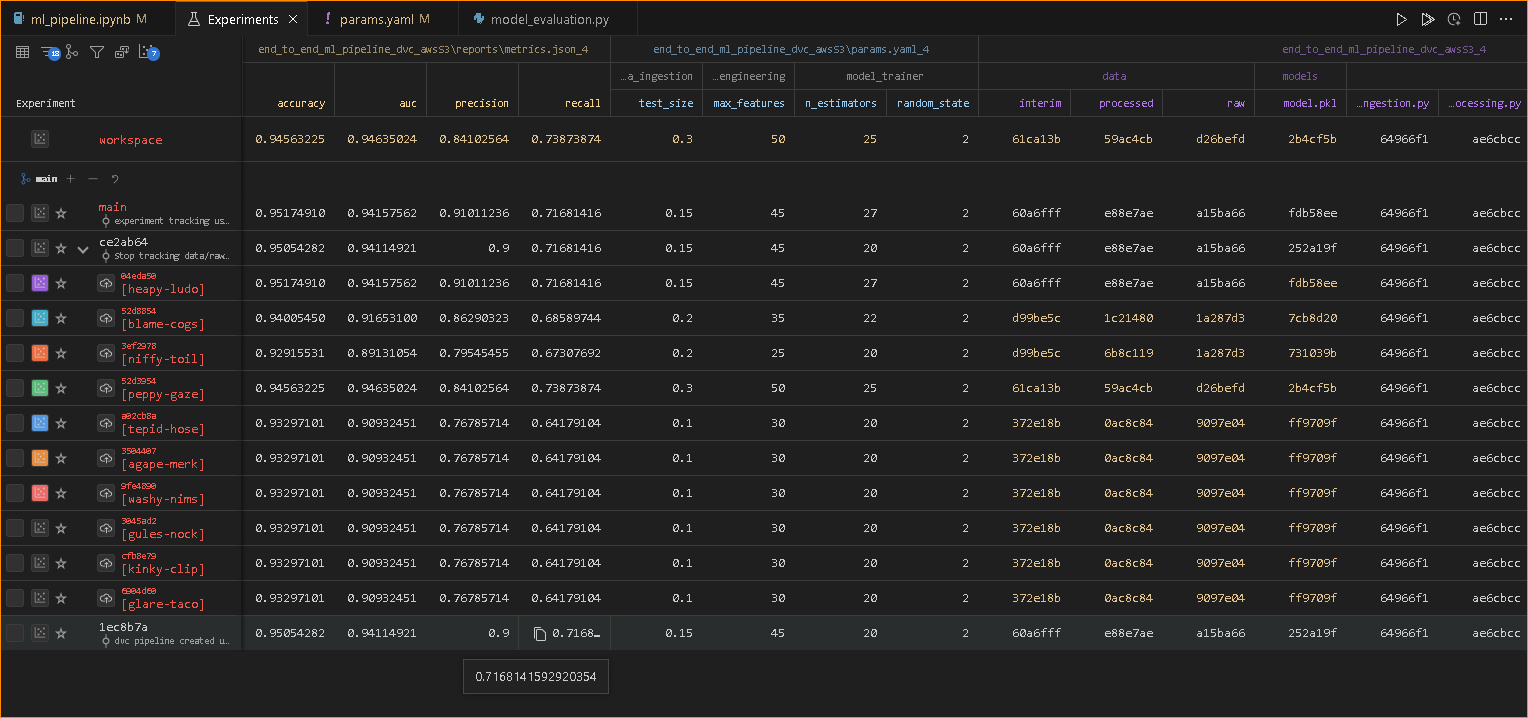

**`Adding a remote S3 storage to DVC`**

1. login to aws & create iam user
2. create s3 bucket
3. pip install dvc[s3] & awscli
4. run `aws configure`
5. run `dvc remote add -d dvcstore s3://<bucketname>`

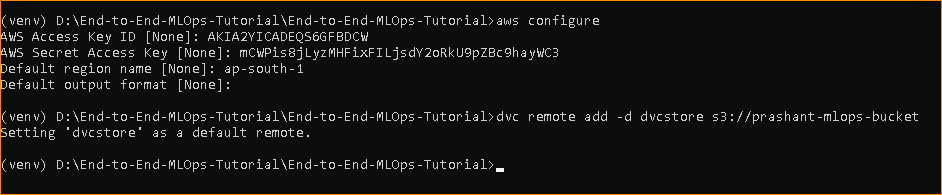

6. reproduce the selected dvc experiment again `dvc exp apply <experiment-name>`
7. `dvc commit` to commit the changes
8. Now currently the bucket is empty

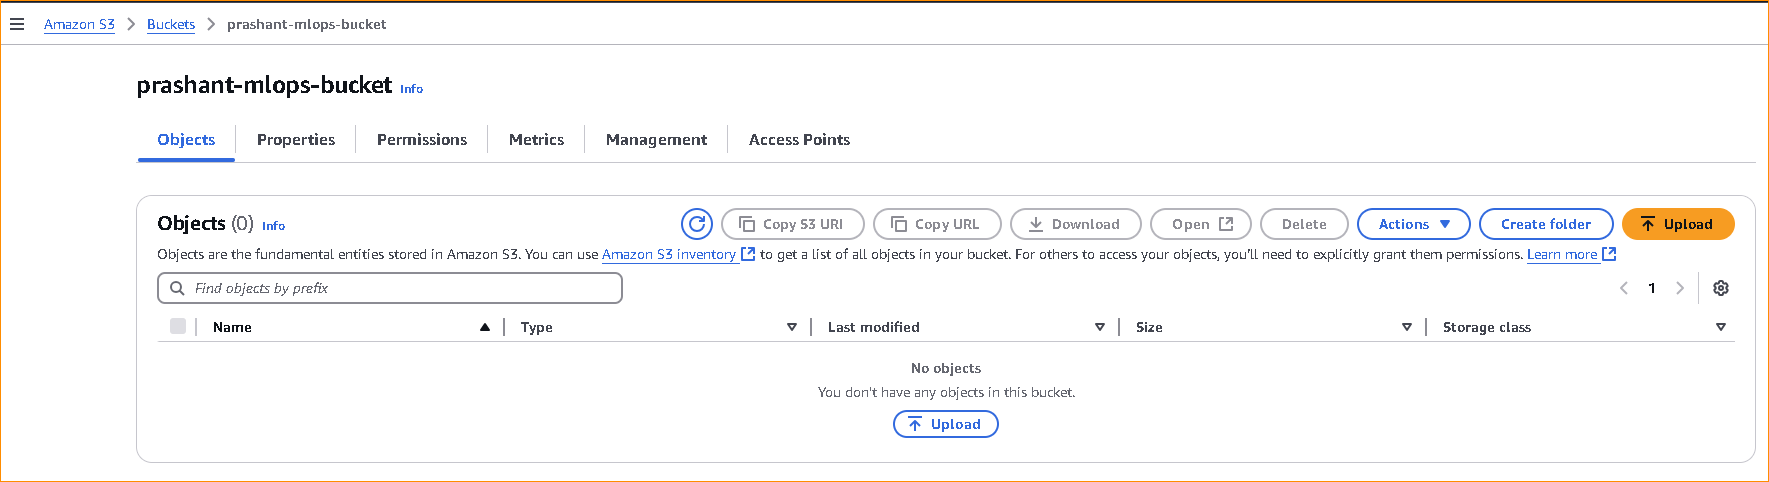

9. run `dvc push` to push to s3 bucket

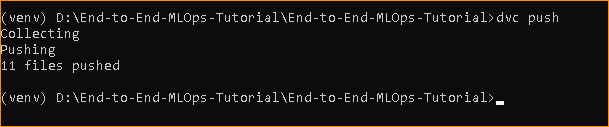

10. all the files saved in s3 bucket

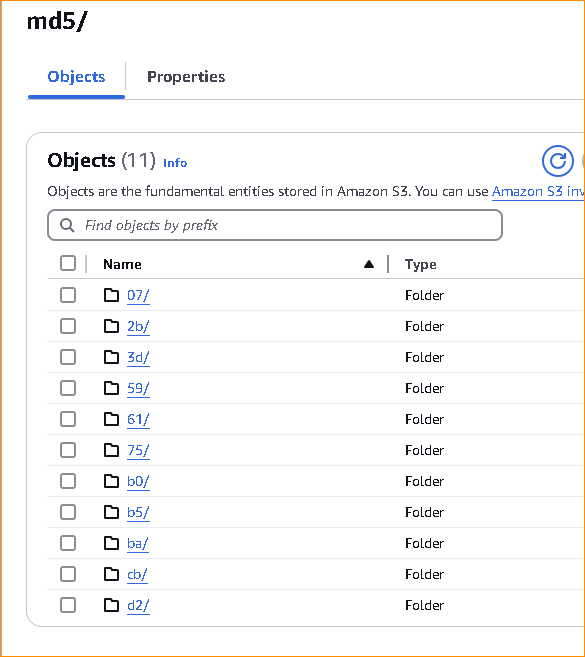